# A/B Testing Framework: Marketing Campaign Analysis

This notebook demonstrates how A/B testing can be used to evaluate the impact of different marketing strategies on user conversion rates. We'll use a real-world dataset from Kaggle: [Marketing A/B Testing](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing).

---

## Business Objective

Imagine you're a data analyst at a brand considering two marketing approaches:
- **Control (Public Service Announcement / PSA)** — a non-commercial message
- **Test (Advertisement / Ad)** — a direct commercial ad

Your goal is to determine whether using ads leads to a significantly higher conversion rate compared to PSAs.

We'll:
- Load and explore the dataset
- Compare conversion rates between groups
- Use statistical testing to validate significance
- Offer business-friendly insights and recommendations

In [1]:
!pip install pandas numpy matplotlib seaborn scipy statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Display settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

In [7]:
# Load dataset
df = pd.read_csv('JupyterLab/ab_testing/marketing_AB.csv')

# Preview
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [8]:
# Overview of dataset
df.info()

# Check for nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

### Group Balance

We check whether users were randomly and evenly assigned to control (PSA) and test (Ad) groups.

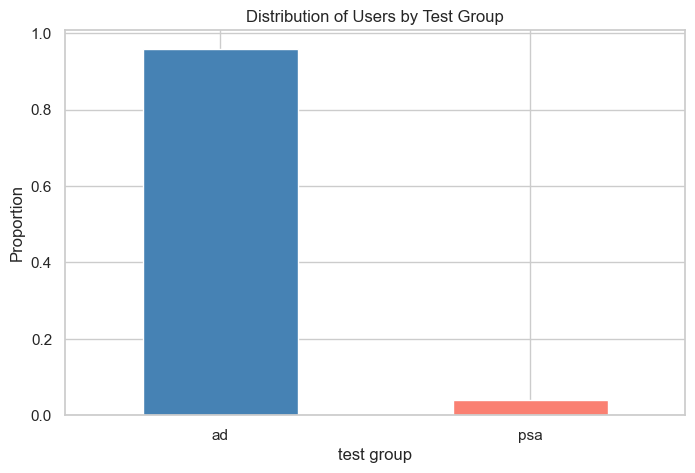

In [9]:
# Distribution of users in each group
df['test group'].value_counts(normalize=True).plot(kind='bar', color=['steelblue', 'salmon'])
plt.title('Distribution of Users by Test Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [ ]:
### Conversion Comparison

We visualize the conversion rates between the control and test groups.

C:\Users\vpjd8\AppData\Local\Temp\ipykernel_22156\3580328206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_rates, x='test group', y='converted', palette='Set2')


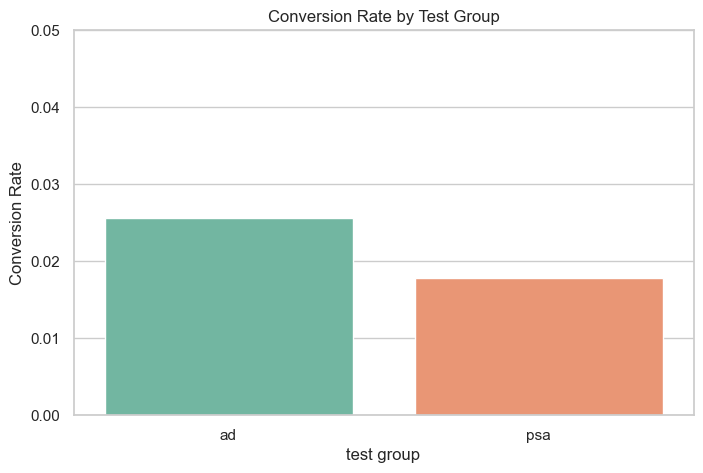

In [10]:
# Conversion rate by test group
conversion_rates = df.groupby('test group')['converted'].mean().reset_index()

sns.barplot(data=conversion_rates, x='test group', y='converted', palette='Set2')
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.05)  # Adjust based on observed rates
plt.show()

In [11]:
# Summary statistics
df.groupby('test group')['converted'].agg(['count', 'sum', 'mean'])

,count,sum,mean
test group,,,
ad,564577,14423,0.025547
psa,23524,420,0.017854


### Hypothesis

We conduct a two-sided z-test to check if the conversion rates between the two groups are significantly different.

- **Null Hypothesis (H₀)**: Conversion rate of Ad group = Conversion rate of PSA group
- **Alternative Hypothesis (H₁)**: Conversion rate of Ad group ≠ Conversion rate of PSA group

We use a significance level of **α = 0.05**.

In [12]:
from statsmodels.stats.proportion import proportions_ztest

# Successes and observations for each group
successes = np.array([14423, 420])
n_obs = np.array([564577, 23524])

# Z-test
z_stat, p_value = proportions_ztest(count=successes, nobs=n_obs, alternative='two-sided')

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.5f}")

Z-statistic: 7.370
P-value: 0.00000


### Test Conclusion

- **Z-statistic** tells us how many standard deviations away the observed difference is from the null.
- **P-value** < 0.05 → we **reject the null hypothesis**.

💡 This means the conversion rate **is significantly higher** for the Ad group — the difference is *unlikely to be due to random chance*.

## Business Recommendation

Based on the analysis:

- The **Ad group** has a conversion rate of **2.55%**, significantly higher than the **1.79%** of the PSA group.
- The difference is **statistically significant** (Z = 7.37, p < 0.001).
- This suggests that **using advertisements instead of PSAs leads to higher user conversion**.

### Recommendation:
The business should **prioritize ads** over PSAs for customer acquisition — especially when aiming to boost short-term conversions.

Further analysis could include:
- Segmenting by day/hour of most ads
- Multi-variate testing with creatives/copy
- ROAS and cost-effectiveness analysis if spend data is available
